<a href="https://colab.research.google.com/github/climabhi/Dataset-Repository/blob/main/YOLO_v8_identifying_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The basics, this is all the code you need to make your own Yolo v8 detection model in just 10 simple steps**

My aim is for it to make logical sense and I will explain each piece of code and what it does inside this notebook.

1. This is a simple function that when run will display the current status of your computer program and tell you if you are running GPU (graphics processing unit).

If you are not, you can turn it on by clicking 'Runtime', 'Change runtime type' and 'GPU' in the drop-down menu then **'Save'**

Why is this important? It will allow the program to run a lot quicker!

In [ ]:
!nvidia-smi

2. This is not an essential function but helps to keep all the code organised especially as we go further through it can get complicated.

What it is doing:
'import os' --> is allowing the code to interact with the operating system
'HOME = os.getcwd()' --> this is getting the working directory of the python script and assigning it to a variable called HOME
'print(HOME)' --> prints the function this is not essential but helpful if you have to debug later

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

3. These 2 functions are installing the YOLO v8 package so that it can be used to identify and classify objects - essential!

'!pip install paralytics == 8.0.20' --> This is literally installing the latest version (beware this may update due to the time I am publishing this so ensure you have the latest model available)

'from IPython import display' --> This is a tool in the Python package that allows the program to work with images and videos

'display.clear_output()' --> this is removing any previous history that may be inside the code so it can run the new display on a clean slate.

'import ultralytics' --> Ultralytics is a computer vision company which provides open-source software, including the YOLO algorithm

'from ultraytics import YOLO' --> importing YOLO from the database

'from IPython.display import display, Image' --> this will allow the code to display images


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

**Importing dataset from Roboflow**

This is quite hard to explain step by step so I would suggest finding a youtube video if you get stuck.

https://roboflow.com/

Obviously, first, you need to create an account. Upload and annotate your images. Finally, export your code snippet which is needed for the next section.

⚠ Do not share your API key!

**This next piece of code is mostly produced by roboflow so you do not have to write it yourself!**

4. Uploading your custom data set from Roboflow

'!mkdir {HOME}/datasets' + '%cd {HOME}/datasets' --> This is creating a directory called datasets within the existing HOME directory. Then change the current directory to HOME

'!pip install roboflow' --> Does what it says installs roboflow from PyPI package

'from roboflow import Roboflow' + 'rf = Roboflow(api_key="--Confidential--")' --> this allows access to your data set by using your API key, hence why it is not shown!

'project = rf.workspace("your workspace name").project("project name")' --> This line creates a new project in the directory so the future code can navigate it.

'dataset = project.version(x).download("yolov8")' --> this is downloading yolov8 and assingning it to 'datasets'

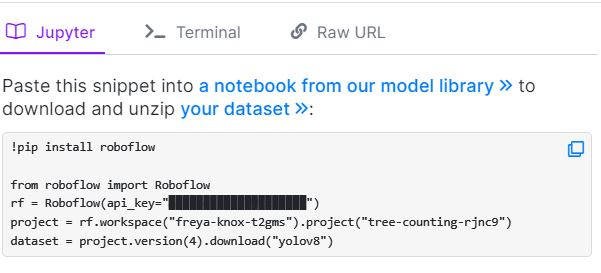

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow



5. Okay so now for the training of the model! This may take a while 😴

What this code does:

'task=detect' --> telling the code the task is object detection

'mode=train' --> model should be trained

'model=yolov8s.pt' --> the specific model architecture that is used for training

'epochs=25' --> this means the specific number of times the code will be run all the way through. The higher the number the better the accuracy but the longer it will take.

'imgsz=800' --> Input image size for the model

'plots=true' --> Training loss and accuracy data plots should be generated during training as we will use it to refine the training later.

In [ ]:

%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=15 imgsz=200 plots=True

6. This line is just sorting out the files in the directory

Why? So when you click on the file tab on the left-hand side bar it is easy to navigate when testing the images later.

In [ ]:
!ls {HOME}/runs/detect/train/

7. This runs a confusion matrix which helps show you how accurate your model is at classifying objects

So what is a confusion matrix and what to look for, it will compare the predicted classifications with the pre-trained 'true' classifications and output the percentage cross-over and the confusion in a grid.


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

8. Similar to the code above this is showing multiple graphs of how effective the model is.

What to look for on the graphs?

- The first graph will show a loss, this is a measure of how well the model is predicting the correct output. The graph should decrease as the model gets better, if there is a sudden spike there may be something wrong with the training process.

- There will also be graphs showing validation loss and accuracy this is important and should follow a similar line to the training graphs. The validation set (usually 10% of data) is photos that the program has not seen so you can see if your program is learning or just memorising.

- Pression and Recall graphs; Pression shows the proportion of true positive predictions that were correct out of all the positive predictions and Recall measures how well the program finds positive instances. You want both graphs to be high.

- mAP50 = Average precision at a threshold of 0.5. showing how accurate the models are with IoU (Intersection over Union)

- mAP50-95 = Average precision at a threshold range from 0.5 to 0.95. Measuring if the object is correctly identified with the IoU between 5% and 95%

This looks a little confusing but to summarize you should see the loss graphs decreasing and the other graphs increasing if there are any crazy spikes or plateaus it may be worth looking at your input data and making it more accurate or increasing the data sample size.

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

9. These next 3 snippets of code are just filling and demonstrating that your code is working but outputting examples!

The first section will show a grid of the training model working and images with detection boxes around them!

The next section will organise your images in the files so that they are easy to find and test.

Finally, the last snippet will show you 3 images from your test image data set and using the confidence threshold of 0.25 the images will be annotated with detection boxes and confidence score.

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

10. The finall part is just uploading your trained data set back to Roboflow so you can test it with other images and videos!

Once this line runs you should be able to log back onto roboflow and see your version with a green tick next to it. This means the modle has been trained and you can now use it to upload unseen images and it will detect the objects!

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

🏆**Congratulations you did it!** 🏆

You have officially written your own AI object detection model, I really hope it worked, if not there are loads of youtube videos on how to make it work.

A little side note, just because you used a pre-written and structured model, all coders use other people's code! Just use this as a base to understand what each bit of code does and make some cool stuff.

Anyways, enjoy you can always reach me on LinkedIn: https://www.linkedin.com/in/freyaknox/